# DREAMTEAM PROJECT 1

## Datasets to be used
    1. Trading cards (high liquidity cards) - https://www.mtggoldfish.com/sets/Unlimited+Edition
    
    2. Bitcoin current price - https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD
    
    3. Bitcoin historical data - https://www.google.com/finance/quote/BTC-AUD
    
    4. Government bond (baseline) - https://www.google.com/finance/quote/GOVT:ASX?window=5Y
    
    5. ASX200 (general stock market) - https://www.google.com/finance/quote/XJO:INDEXASX
    
    6. Property - ABS data in 8 capital cities- https://www.abs.gov.au/statistics/economy/price-indexes-and-inflation/residential-property-price-indexes-eight-capital-cities/latest-release

In [267]:
# Intialising imports
import os
import requests
import pandas as pd
import numpy as np
import json
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot.pandas 


%matplotlib inline

###  DATA CLEAN

In this section, we will clean (drop nulls) and organise (set Date Time Format and Index) the following datasets:
    
    1. Bitcoin historical data
    2. ASX200 historical data
    3. ASX Bonds historical data
    4. Australian Capitals Property historical data
    5. Trading Cards data

In [283]:
# Importing Bitcoin historical data

# Set the file path
btc_path=Path("btc_historical.csv")

# Reading the data
btc_df=pd.read_csv(btc_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
btc_df.index = btc_df.index.date
btc_df = btc_df.sort_index()

# Ensuring data loaded correctly
btc_df.head()

,Close
2015-11-19,454.097675
2015-11-20,445.560711
2015-11-22,447.867676
2015-11-23,449.365998
2015-11-24,442.422744


In [284]:
# Cleaning Bitcoin historical data

# Count nulls
btc_df.isnull().mean()

# Drop nulls
btc_df = btc_df.dropna()

# Checking nulls are dropped
btc_df.isnull().sum()

Close    0
dtype: int64

In [285]:
# Importing and cleaning ASX200 historical data

# Set the file path
asx200_path=Path("asx200_historical.csv")

# Reading the data
asx200_df=pd.read_csv(asx200_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
asx200_df.index = asx200_df.index.date
asx200_df = asx200_df.sort_index()

# Ensuring data loaded correctly
asx200_df.head()

,Close
2011-05-20,4732.2
2011-05-23,4643.0
2011-05-24,4628.8
2011-05-25,4584.7
2011-05-26,4660.2


In [286]:
asx200_df.isnull().mean()

Close    0.0
dtype: float64

In [287]:
# Importing and cleaning ASX bonds historical data

# Set the file path
bonds_path=Path("asx_bonds.csv")

# Reading the data
bonds_df=pd.read_csv(bonds_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
bonds_df.index = bonds_df.index.date
bonds_df = bonds_df.sort_index()

# Ensuring data loaded correctly
bonds_df.head()

,Close
2012-07-27,25.00
2012-08-08,24.57
2012-09-12,24.92
2012-09-19,24.78
2012-09-24,24.71


In [288]:
bonds_df.isnull().mean()

Close    0.0
dtype: float64

In [289]:
# Importing and cleaning property historical data

# Set the file path
property_path=Path("property_history.csv")

# Reading the data
property_df=pd.read_csv(property_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

property_df = property_df.drop(columns=['Sydney', 'Melbourne', 'Brisbane','Adelaide','Perth', 'Hobart', 'Darwin', 'Canberra'])
property_df = property_df.sort_index()

# Ensuring data loaded correctly
property_df.index = property_df.index.date
property_df.head()


,Weighted Average of eight Capital Cities
2003-09-01,69.0
2003-12-01,71.6
2004-03-01,71.3
2004-06-01,70.6
2004-09-01,70.6


In [290]:
property_df.dropna()
property_df.isnull().mean()

Weighted Average of eight Capital Cities    0.0
dtype: float64

In [291]:
# Importing and cleaning Trading Card historical data

# Set the file path
cards_path=Path("cards_price_historical.csv")

# Reading the data
cards_df=pd.read_csv(cards_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
cards_df.index = cards_df.index.date
cards_df = cards_df.sort_index()

# Ensuring data loaded correctly
cards_df.head()

,Price
2010-11-02,7657.36
2010-11-03,7559.26
2010-11-04,7557.13
2010-11-05,7558.53
2010-11-06,7558.39


In [292]:
cards_df.dropna()
cards_df.isnull().mean()

Price    0.0
dtype: float64

In [293]:
# All Nulls removed from data sets

print (f"asx200 is {asx200_df.isnull().sum()}")
print (f"bonds is {bonds_df.isnull().sum()}")
print (f"property is {property_df.isnull().sum()}")
print (f"BTC is {btc_df.isnull().sum()}")
print (f"cards is {cards_df.isnull().sum()}")

asx200 is Close    0
dtype: int64
bonds is Close    0
dtype: int64
property is Weighted Average of eight Capital Cities    0
dtype: int64
BTC is Close    0
dtype: int64
cards is Price    0
dtype: int64


# Quantitative Analysis

In this section, we will calculate and visualize performance and risk metrics for the portfolios.

This addresses Research Question 1: 
    
    1. What is the risk/return ratio for an Alternative Investment Portfolio (trading cards and bitcoin) versus a Traditional Investment Portfolio (ASX, Property, ASX Bonds).

# Creating the following portfolios and calculating their daily/quarterly returns:

    1. Traditional Portfolio
    2. Alternative Portfolio
    3. Combined Portfolio of traditional and alternative

## TRADITIONAL PORTFOLIO
    1. ASX200
    2. Bonds
    3. Property

In [294]:
# Checking data types and setting them to float variables as needed
print (asx200_df['Close'].dtype)
print (bonds_df['Close'].dtype)
print (property_df['Weighted Average of eight Capital Cities'].dtype)

# All data types are currently float variables

float64
float64
float64


In [295]:
# Calculating daily returns for ASX 200
asx200_df_daily_returns = asx200_df.pct_change()
asx200_df_daily_returns.columns =["ASX 200"]
asx200_df_daily_returns.head()

,ASX 200
2011-05-20,NaN
2011-05-23,-0.018850
2011-05-24,-0.003058
2011-05-25,-0.009527
2011-05-26,0.016468


In [296]:
# Calculating daily returns for Bonds
bonds_df_daily_returns = bonds_df.pct_change()
bonds_df_daily_returns.columns =["Bonds"]
bonds_df_daily_returns.head()

,Bonds
2012-07-27,NaN
2012-08-08,-0.017200
2012-09-12,0.014245
2012-09-19,-0.005618
2012-09-24,-0.002825


In [297]:
# Calculating quarterly returns for Weighted Average
property_df_quarterly_returns = property_df.pct_change()
property_df_quarterly_returns.head()

,Weighted Average of eight Capital Cities
2003-09-01,NaN
2003-12-01,0.037681
2004-03-01,-0.004190
2004-06-01,-0.009818
2004-09-01,0.000000


### Traditional portfolio - Quarterly Returns

In [298]:
# Combining datasets to create traditional portfolio
traditional_df_quarterly_returns = pd.concat([asx200_df_daily_returns, bonds_df_daily_returns, property_df_quarterly_returns], axis="columns", join="outer")
traditional_df_quarterly_returns.dropna().head()

/Users/mikhararamsing/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,ASX 200,Bonds,Weighted Average of eight Capital Cities
2015-06-01,-0.007235,0.001923,0.046683
2015-09-01,-0.021241,0.006551,0.020344
2016-03-01,0.008482,0.001526,-0.001531
2016-06-01,-0.010300,-0.001139,0.019939
2016-09-01,-0.003203,0.004104,0.015038


### Traditional portfolio - Daily Returns

In [299]:
traditional_df_daily_returns = pd.concat([asx200_df_daily_returns, bonds_df_daily_returns], axis="columns", join="inner")
traditional_df_daily_returns.dropna().head()

,ASX 200,Bonds
2012-08-08,0.004893,-0.017200
2012-09-12,0.008207,0.014245
2012-09-19,0.005393,-0.005618
2012-09-24,-0.005172,-0.002825
2012-10-08,-0.002781,0.011736


## ALTERNATIVE PORTFOLIO
    1. Trading Cards
    2. Bitcoin

In [300]:
# Checking data types and setting them to float variables as needed
print (btc_df['Close'].dtype)
print (cards_df['Price'].dtype)

# All data types are currently float variables

float64
float64


In [301]:
# Calculating daily returns for Bitcoin
btc_df_daily_returns = btc_df.pct_change()
btc_df_daily_returns.columns =["BTC"]
btc_df_daily_returns.head()

,BTC
2015-11-19,NaN
2015-11-20,-0.018800
2015-11-22,0.005178
2015-11-23,0.003345
2015-11-24,-0.015451


In [302]:
# Calculating daily returns for ASX 200
cards_df_daily_returns = cards_df.pct_change()
cards_df_daily_returns.columns =["Cards"]
cards_df_daily_returns.head()

,Cards
2010-11-02,NaN
2010-11-03,-0.012811
2010-11-04,-0.000282
2010-11-05,0.000185
2010-11-06,-0.000019


### Alternative portfolio - Daily Returns

In [303]:
alternative_df_daily_returns = pd.concat([btc_df_daily_returns, cards_df_daily_returns], axis="columns", join="inner")
alternative_df_daily_returns.dropna().head()

,BTC,Cards
2015-11-20,-0.018800,-0.008136
2015-11-22,0.005178,-0.004243
2015-11-23,0.003345,0.007557
2015-11-24,-0.015451,-0.001321
2015-11-25,0.025185,-0.024872


## COMBINED PORTFOLIO

In [313]:
combined_df = pd.concat([asx200_df_daily_returns, bonds_df_daily_returns, property_df_quarterly_returns, btc_df_daily_returns, cards_df_daily_returns], axis="columns", join="inner")
#combined_df.index = combined_df.index.date
combined_df.dropna().head()
#combined_df.dtypes

,ASX 200,Bonds,Weighted Average of eight Capital Cities,BTC,Cards
2016-03-01,0.008482,0.001526,-0.001531,-0.013228,-0.003098
2016-06-01,-0.010300,-0.001139,0.019939,0.004740,-0.009345
2016-09-01,-0.003203,0.004104,0.015038,-0.003828,0.000610
2016-12-01,0.010973,-0.004294,0.041481,0.010686,0.000470
2017-06-01,0.002358,0.001538,0.019485,0.057374,0.003367


# PERFORMANCE ANALYSIS

### Daily Returns

In [305]:
#plt.rcParams["figure.figsize"] = (20,8)

# Setting theme and figure size for Seaborn
sns.set_theme(style="darkgrid", palette="deep")
sns.set(rc={"figure.figsize":(20, 8)}) #width=3, #height=4

<AxesSubplot:>

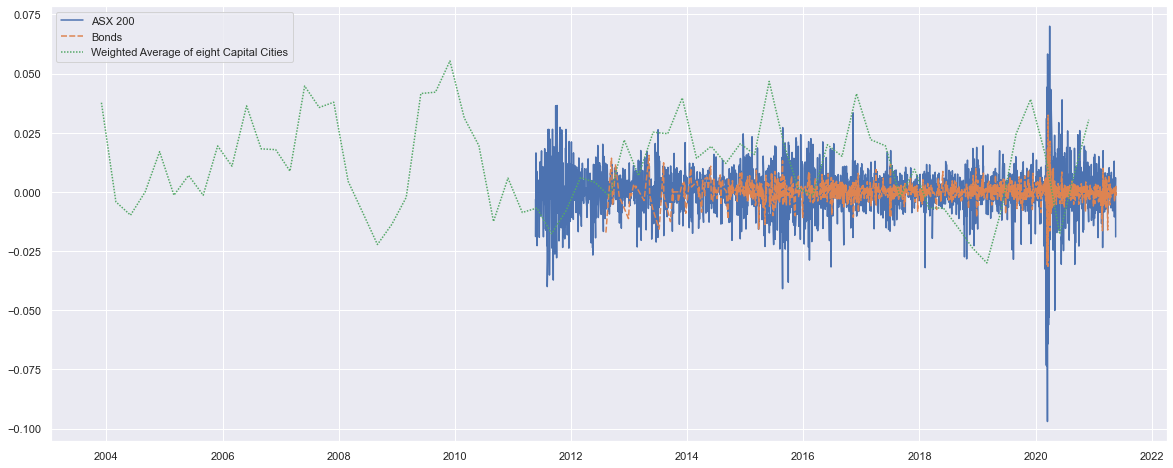

In [306]:
# Traditional Portfolio
sns.lineplot(data = traditional_df_quarterly_returns)

<AxesSubplot:>

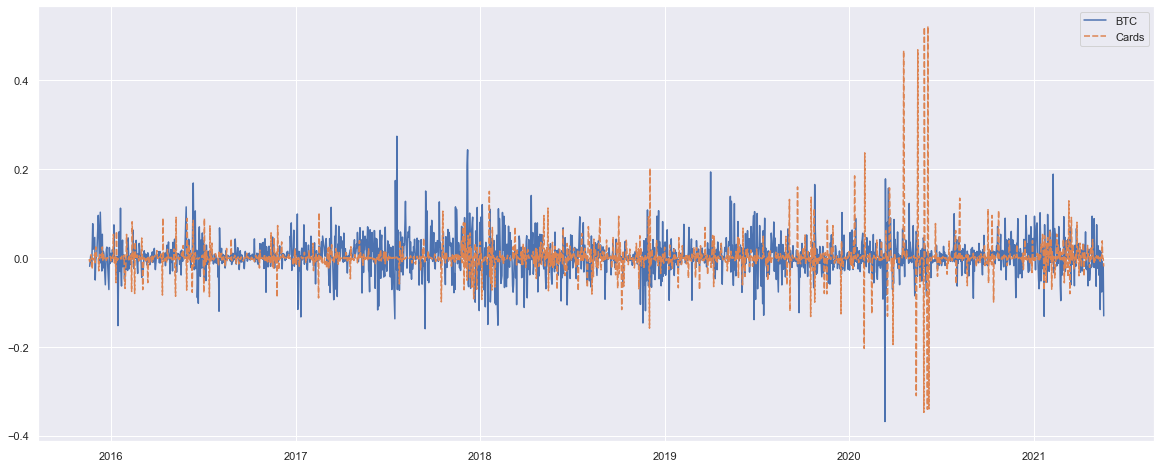

In [307]:
# Alternative Portfolio
sns.lineplot(data = alternative_df_daily_returns)

Text(0.5, 1.0, 'Quarterly Returns for all Portfolios')

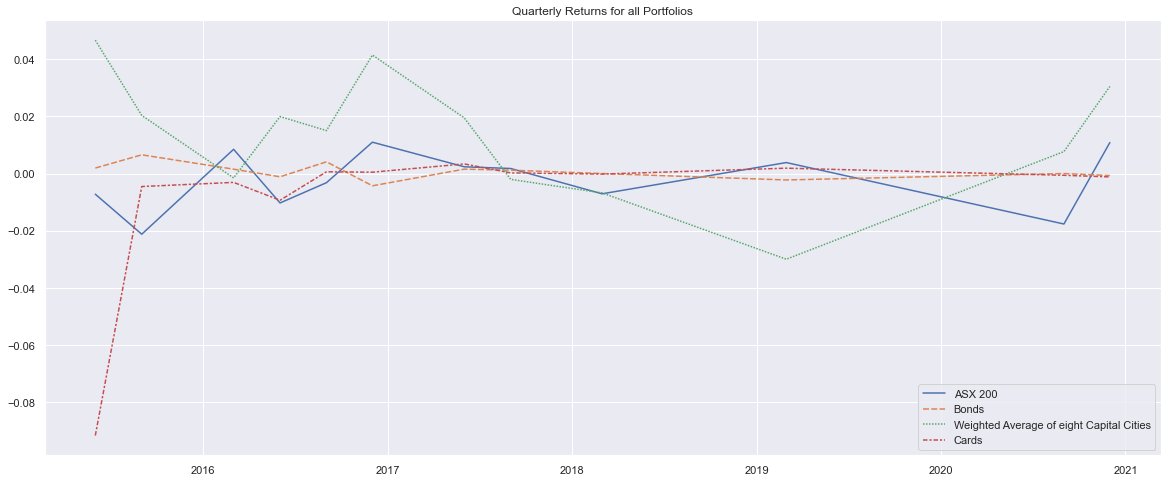

In [312]:
# Combined Portfolio (With Bitcoin)
sns.lineplot(data = combined_df).set_title('Quarterly Returns for all Portfolios')

### Cumulative Returns

Text(0.5, 1.0, 'Cumulative Returns for all Portfolios')

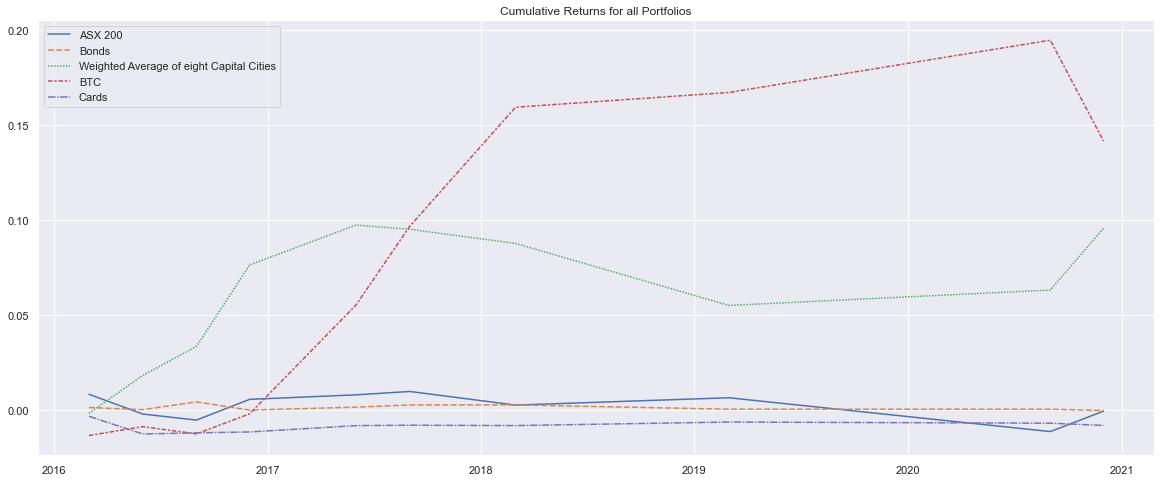

In [310]:
# Used the `cumprod` function to cumulatively multiply each element in the Series by it's preceding element until the end
cumulative_returns = (1 + combined_df).cumprod() - 1
sns.lineplot(data = cumulative_returns).set_title('Cumulative Returns for all Portfolios')

The biggest cumulative returns have come from BTC (which is unsurprising) but this is without risk analysis being done. Interesting to see property start an upward trend as BTC declines. Interesting to also note that Trading Cards sat below the ASX200 and ASX Bonds.

## Risk Analysis

Determining the _risk_ of each portfolio.
In this section we will:
1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

<AxesSubplot:>

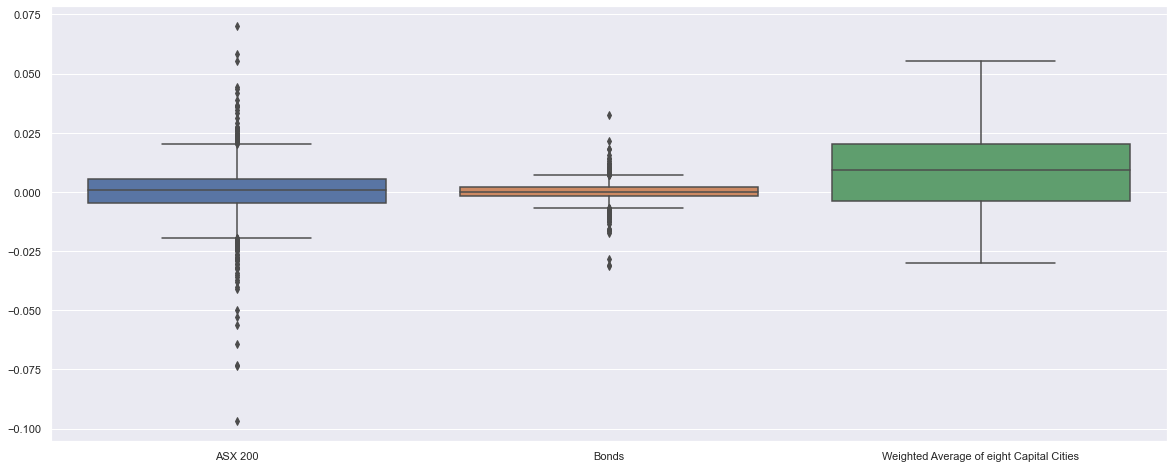

In [231]:
# Box Plot for Tradtional
sns.boxplot(data=traditional_df_quarterly_returns).set_title('Box Plots for Traditional Portfolio')

Text(0.5, 1.0, 'Box Plots for Alternative Portfolio')

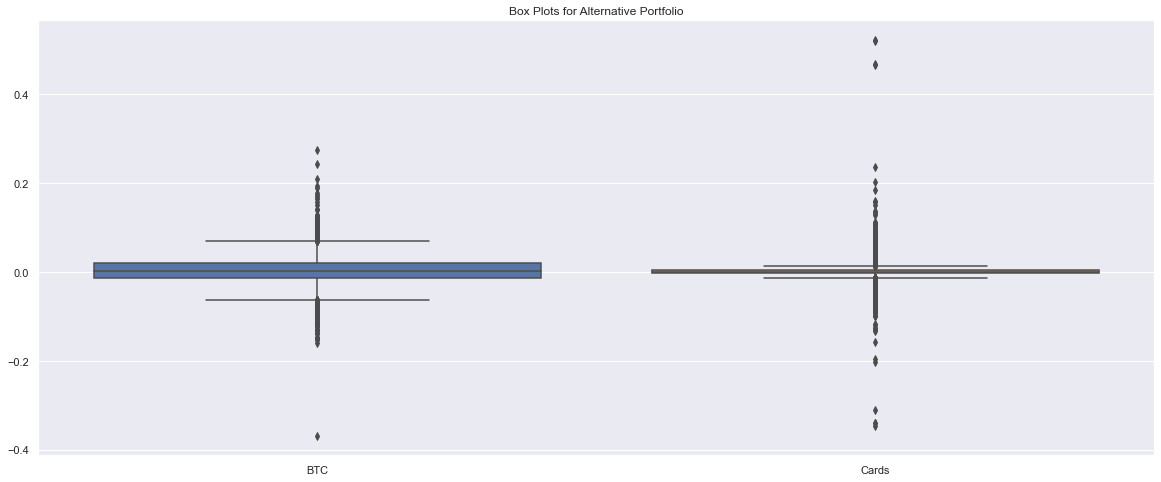

In [232]:
# Box Plot for Alternative
sns.boxplot(data=alternative_df_daily_returns).set_title('Box Plots for Alternative Portfolio')

Text(0.5, 1.0, 'Box Plots for All Portfolios')

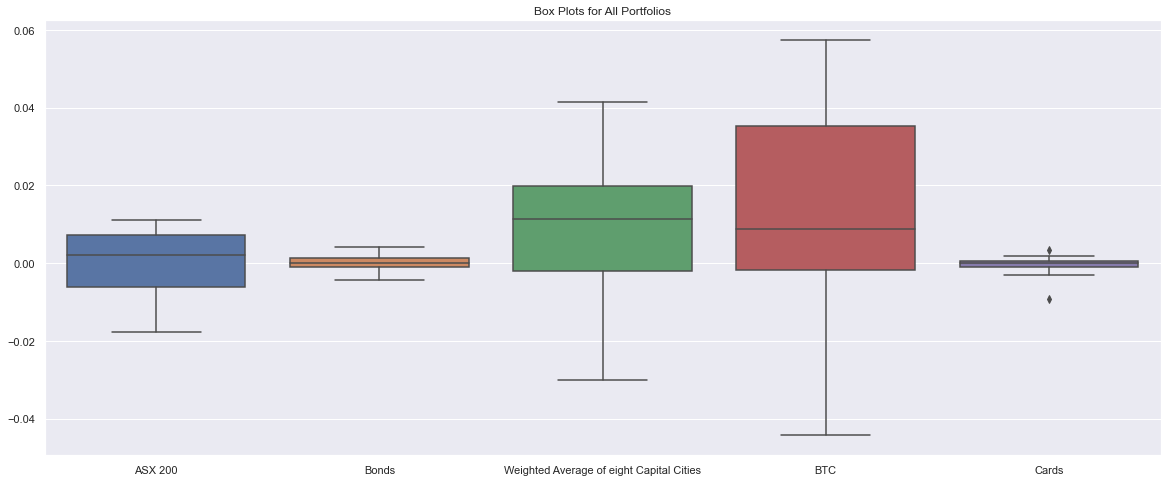

In [233]:
# Box Plot for Combined
sns.boxplot(data=combined_df).set_title('Box Plots for All Portfolios')

Once we start to factor in risk, we see the largest spread occurs for Bitcoin followed by Property, which also provided our two highest cumulative returns. The lowest spread was with cards, almost on par with ASX Bonds.

### Volatility

In [237]:
# Calculate the daily standard deviations of all portfolios
volatility = combined_df.std()

# We will use ASX 200 as a baseline to measure volatility against
asx200_df_daily_returns.std()

ASX 200    0.009973
dtype: float64

In [238]:
volatility.sort_values(inplace=True)
print (volatility)

Bonds                                       0.002314
Cards                                       0.003464
ASX 200                                     0.009501
Weighted Average of eight Capital Cities    0.020511
BTC                                         0.031770
dtype: float64


**Property and BTC are more volatile than ASX200.**

In [ ]:
# Work out annualised

In [314]:
volatility_annualised = combined_df.std()* np.sqrt(252)
volatility_annualised.sort_values (inplace=True)
print(volatility_annualised)

Bonds                                       0.004628
Cards                                       0.006929
ASX 200                                     0.019003
Weighted Average of eight Capital Cities    0.041021
BTC                                         0.063540
dtype: float64


**Even when annualised, we see that BTC and Property remain more volatile/riskier than the ASX 200. Interesting to note, cards are less volatile than ASX200**

## Risk over time - Rolling Statistics

Text(0.5, 1.0, 'Rolling Std Deviation for combined portfolios (21 day window)')

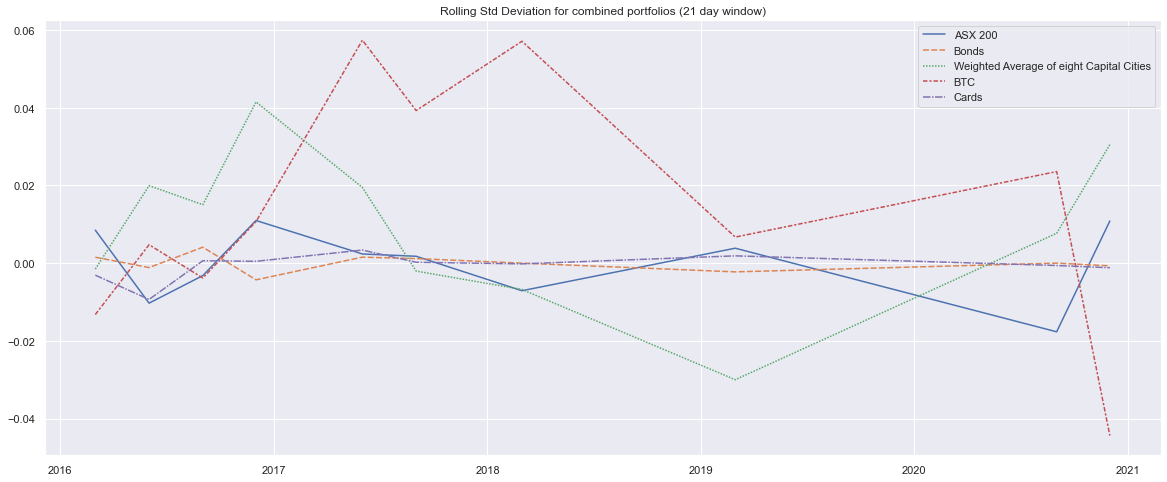

In [243]:
combined_df_std_21 = combined_df.rolling(window=21).std()
sns.lineplot(data = combined_df).set_title('Rolling Std Deviation for combined portfolios (21 day window)')

**When looked at over time, a 21 day rolling window, we see a drastic drop in BTC and continued rise in Property and the ASX200**

### Correlation

<AxesSubplot:>

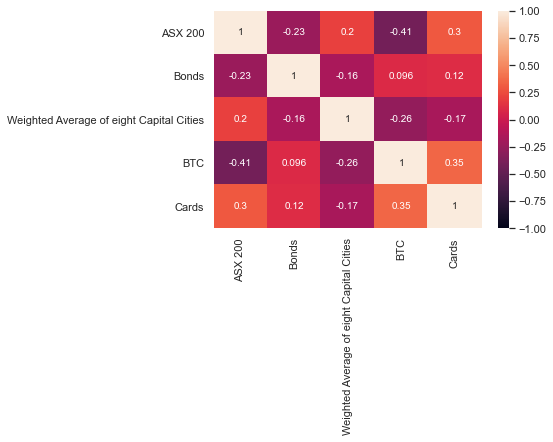

In [271]:
correlation = combined_df.corr()
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

**Interesting to note the least correlation occurs between BTC and ASX200 with the most correlation occurring between BTC and Cards. We think this may be the case because there is a correlation between people who invest in BTC and Cards, inclined to invest in both these markets.**

### Beta
We note a Beta analysis would not be relevant in this context because we are comparing general markets, we are on the baseline and do not have a market to compare against.

### Sharpe Ratios

In [331]:
# ASX
sharpe_ratio_asx = float((asx200_df_daily_returns.mean() * 252) / (asx200_df_daily_returns.std() * np.sqrt(252)))

# Bonds
sharpe_ratio_bonds = float((bonds_df_daily_returns.mean() * 252) / (bonds_df_daily_returns.std() * np.sqrt(252)))

# Property - quarterly
sharpe_ratio_property = float((property_df_quarterly_returns.mean() * 4) / (property_df_quarterly_returns.std() * np.sqrt(4)))

# BTC
sharpe_ratio_btc = float((btc_df_daily_returns.mean() * 365) / (btc_df_daily_returns.std() * np.sqrt(365)))

# Cards
sharpe_ratio_cards = float((cards_df_daily_returns.mean() * 365) / (cards_df_daily_returns.std() * np.sqrt(365)))

In [335]:
sharpe_ratio_combined = pd.DataFrame([sharpe_ratio_asx,sharpe_ratio_bonds,sharpe_ratio_btc,sharpe_ratio_cards,sharpe_ratio_property])

sharpe_ratio_combined.index = ['sharpe_ratio_asx','sharpe_ratio_bonds','sharpe_ratio_btc','sharpe_ratio_cards','sharpe_ratio_property']
sharpe_ratio_combined.head()



,0
sharpe_ratio_asx,0.319739
sharpe_ratio_bonds,0.275642
sharpe_ratio_btc,1.529035
sharpe_ratio_cards,0.733691
sharpe_ratio_property,1.167767


In [336]:
#sharpe_ratio_asx.hvplot.bar(x='Year', y=['sharpe_ratio_bonds', 'sharpe_ratio_btc','sharpe_ratio_cards','sharpe_ratio_property'], value_label='Ratio')
sharpe_ratio_combined.hvplot.bar()

:Bars   [index]   (0)

Based on a Sharpe Ratio Analysis, investing in Bitcoin has the best return relative to risk, this is closely followed by Property. Interesting trading cards, has the next best Sharpe Ratio thereby proving our Hypothesis **True** where an Alternative Investment Portfolio provides a higher Sharpe ratio of the last 5 years compares to a Traditional Investment Portfolio.

# EXAMPLE INVESTMENT - Alternative Portfolio vs Traditional Portfolio
Potentiall plot if invested $10K in each what would happen over time

In [262]:
# Importing Bitcoin current price - Yet to be used.
# Bitcoin API URL
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=AUD"

# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_content = btc_response.content
btc_data = btc_response.json()
#print (json.dumps(btc_data, indent=4))
btc_price_current = float (btc_data["data"]["1"]["quotes"]["USD"]["price"])
print (btc_price_current)

39295.0


<AxesSubplot:>

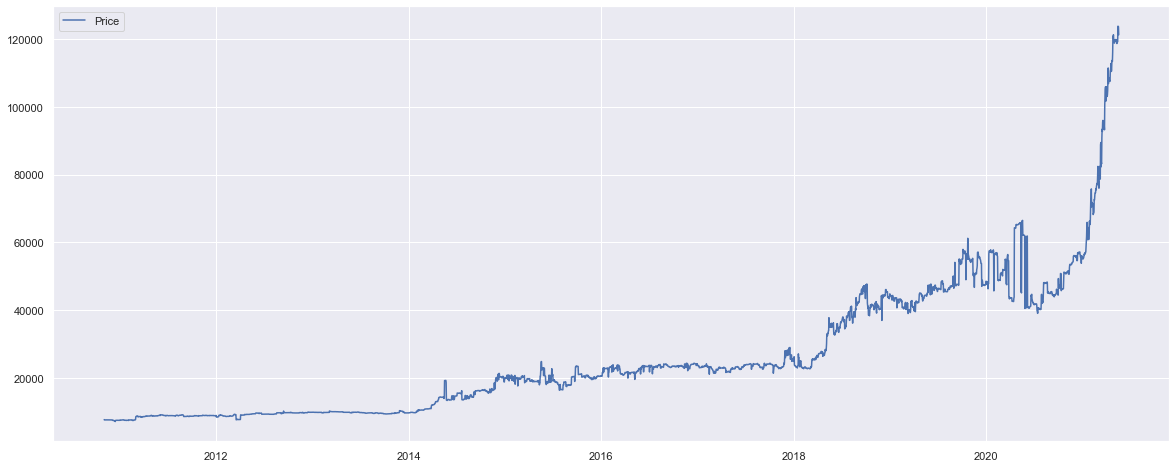

In [318]:
sns.lineplot(data =cards_df)

# SENTIMENT ANALYSIS
    >Defined a function to allocate a score to each of the Reddit comments scraped in various relevant sub-reddit groups.
	> We subtracted the negative from the positive score to provide a value of the sentiment.
	> Plot the sentiment value over time for each of the investments in our Portfolio.